In [147]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import netCDF4 as nc
import cmocean as cm
import glob
import arrow
import gsw

In [148]:
def make_nclen(start,end,ftype, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_sens = '/data/tjarniko/results/BASERUN_EXP/MAIN/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        #print(tnc_sens[0])
        sens_ar.append(tnc_sens[0])
        
    return sens_ar

In [149]:
start = '2015-01-01'
end = '2015-12-31'
ftype = 'carp'
sdir = 'BR_2nd_2015'
varname = 'dissolved_inorganic_carbon'

sens_ar = make_nclen(start,end,ftype, sdir)

In [150]:
#open one nc file and extract DIC
t_test = nc.Dataset(sens_ar[0])
tdat = t_test[varname][:]
print('maximum of dissolved inorganic carbon')
print(np.max(tdat))

maximum of dissolved inorganic carbon
2293.0935


In [151]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#get udir, vdir, wdir
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
wdir = grid['e3t_0'][0,:,:,:]
tmask = grid['tmask'][0,:,:,:]

#ok so here our tmask is 1 iff we have an ocean, 
print(np.shape(tmask))

#we set it to 0 at the 20 cell border to not worry about the sides of the domain
#we also set tdat (our variable) that way 
tmask[:,878:898,:] = 0
tmask[:,:,0:20] = 0
tdat[:,878:898,:] = 0
tdat[:,:,0:20] = 0

#surface area for every cell
surfa = udir*vdir

#broadcast surface area 
surfa_broadcast = np.zeros((40, 898, 398))

for d in range(0,40):
    surfa_broadcast[d,:,:] = surfa[:,:]

#finally we have the cell size for every cell in the system. it's 0 if the cell is not water in the domain we want
cellsize = surfa_broadcast*wdir*tmask
    
    


(40, 898, 398)


In [152]:
#multiply mmol/m3 by m3 to get mmol in a given cell - call it tdat_with_vol
tdat_fc = tdat[0,:,:,:]
tdat_withvol = tdat_fc*cellsize


In [153]:
print(np.shape(tdat_withvol))

tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)
cellsize_alldomain = np.sum(np.sum(cellsize,axis = 1),axis = 1)
print(np.shape(tdat_alldomain))


(40, 898, 398)
(40,)


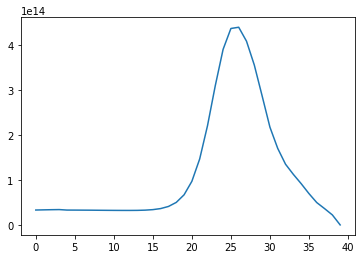

In [154]:
plt.plot(tdat_alldomain)

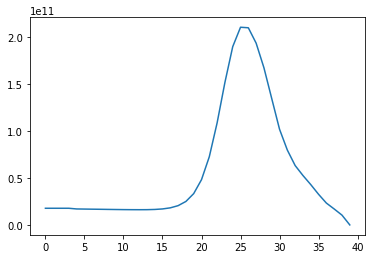

In [155]:
plt.plot(cellsize_alldomain)

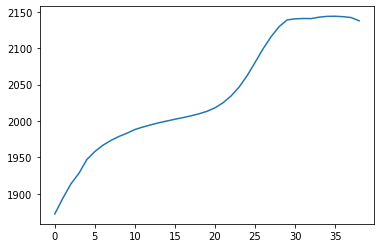

In [156]:
plt.plot(tdat_alldomain/cellsize_alldomain)

In [157]:
BR_sums_perday = np.zeros((40,365))
PI_sums_perday = np.zeros((40,365))
LA_sums_perday = np.zeros((40,365))

In [158]:
start = '2015-01-01'
end = '2015-12-31'
ftype = 'carp'
sdir = 'BR_2nd_2015'
# varname = 'dissolved_inorganic_carbon'

BR_ar = make_nclen(start,end,ftype, sdir)

sdir = 'PI_3rd_2015'
LA_ar = make_nclen(start,end,ftype, sdir)

sdir = 'PI_ACBC_2015_3'
PI_ar = make_nclen(start,end,ftype, sdir)

In [160]:
for i in range(0,365):
    
    if (i%5 ==0):
        print(i)
    
    t_test = nc.Dataset(BR_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    BR_sums_perday[:,i] =  tdat_alldomain
    

0
[33195090245213.086 33574794057947.305 33923452666187.953 34180777712120.9
 33093158819741.26 33038895914471.633 32943720762427.24 32846816281472.836
 32677588632273.14 32531074111698.156 32408152620734.594 32321504912487.58
 32304515552525.918 32434690270515.004 32928318740343.273
 34065691405377.336 36437737192632.875 41152169316347.75 50200566890689.24
 67126670968140.6 97234520113301.38 147032221097210.12 220976849668084.25
 310510009923990.0 391362998336176.75 437917809756832.75 440680286143730.5
 409558297094723.25 356360657061411.56 287728187011183.4
 217986138740969.88 170586241695646.2 135327767498749.53
 112739605165961.47 92047913875518.44 69869430796439.97 49861739761101.1
 36372453976975.21 22298755141097.176 0.0]
5
[33451080548184.957 33770002083917.727 34022566177852.668
 34195632813404.156 33057852850472.375 32964301403521.945
 32853590206905.902 32757228597584.367 32595392877727.32 32459179733252.56
 32347196970420.863 32271042960713.582 32262509148196.082
 324012370

60
[32114000355736.504 32277713148133.39 32594434044420.266 32925410613457.13
 32002681358219.195 32085755558219.758 32119075356035.31 32124260234549.89
 32038824390440.414 31961744805838.402 31898057675592.32
 31863096603914.914 31890035229955.066 32058454484298.562
 32581312877171.984 33738594791419.676 36117219007446.76 40819623648070.69
 49827537097645.14 66668359878742.61 96620116901174.9 146162147008342.97
 219714763556389.94 308776506803130.25 389293580653671.2 435812638803833.1
 438509434256505.44 407687602402932.1 355082536497502.0 286937580907059.0
 217490241805492.8 170287299241373.88 135137455330947.5 112619522583341.73
 91970216988113.72 69818325144648.35 49830313203420.164 36354293443784.49
 22290515469173.45 0.0]
65
[31185695829037.902 31614872093386.71 32102768211079.652 32492360646006.24
 31634542404129.58 31767440449087.273 31873099093127.684 31955051641626.82
 31935437741534.645 31906805256575.062 31875038549845.074
 31858907602234.82 31897213501619.523 3207251776649

120
[30077259797523.223 30454740936746.91 30899093753980.598 31337189135126.56
 30609204856301.812 30797659689390.28 30889774885397.688
 30934922076843.746 30894349932838.227 30870753774605.758
 30866810600818.508 30893193086547.72 30979434786142.89 31200089968450.406
 31759101625043.758 32936096632973.586 35310096559681.84 39968072962906.89
 48871984475940.94 65530448604051.18 95247065268211.53 144658465341370.12
 218643088816520.12 309156832316476.4 391890991471762.56 439720526700336.0
 441886183600906.1 409865495017236.0 356135683436851.4 287212785063601.5
 217445091282099.56 170173418661359.56 135025924175610.72
 112543248782605.44 91922440597573.16 69785132428885.64 49806786330900.05
 36337592464630.12 22280108140596.13 0.0]
125
[30088295331513.67 30433443178261.203 30842914737809.164
 31200140753391.707 30402690899794.32 30558809174795.363
 30673575364391.305 30773702218041.984 30795524492423.137
 30828127975669.258 30870738212797.89 30934596347029.023
 31052697566889.387 3130205

180
[28848124317118.207 29332948200700.516 30006865810005.676
 30574958723079.023 29876665860711.297 30057607408815.562
 30172163701044.547 30262111348697.46 30277989287901.855 30314252210420.65
 30372584666497.703 30463656533279.48 30616799184812.094
 30907009917877.375 31534687579218.703 32777467843886.332
 35217489664193.13 39952415722489.695 48965480578596.336
 65815475289781.016 95918515848910.4 146102725393766.56 221357469675023.94
 313476747268567.4 397252080892864.06 444819433672323.56
 446312951026457.94 413193430519464.44 358248046280630.8 288363476786892.1
 217871205954356.44 170174984660411.3 134843414335335.72
 112278986526980.02 91675442266657.97 69596645373267.48 49686255182145.82
 36273311365528.4 22264178378450.88 0.0]
185
[30330235445760.516 30687825632689.36 31229625497156.426
 31699673546283.992 30890736719376.15 30968472105035.812
 31000076462327.574 31029322989598.574 30988579959284.363
 30963364875725.832 30954239038111.234 30975457177772.137
 31058431630066.95 3

240
[31759379896997.58 31964168699446.562 32244634387294.562
 32519247623674.152 31542502520894.016 31575227490756.258
 31583643778021.234 31604806957748.062 31570628370569.414
 31563753674437.914 31579192166429.36 31624448199510.152
 31730578270279.176 31975367819332.113 32569608487844.6 33797900457546.855
 36254155302798.12 41055781551868.49 50217493385276.73 67337382437670.36
 97838112106242.16 148459341553938.4 223965164100361.3 316079558964306.75
 399821460971459.1 447526824799632.6 449091445689458.7 415766766526456.56
 360386632809726.75 289930329671547.5 218832464529943.8 170735889030906.94
 135147981315089.45 112472972361947.77 91804375985001.03
 69690249630032.805 49746796824182.94 36293492826887.88 22259697088093.9
 0.0]
245
[32541298146986.61 32743694001473.31 33055171096872.79 33342700745712.77
 32340830028651.48 32311994390050.4 32253148362859.86 32201253509213.184
 32086858775331.61 31998661418884.39 31934058607281.133 31905240042995.797
 31947286211874.21 32139224796689.

300
[33112115564521.902 33376612607331.305 33681027431983.836
 33948185936155.04 32917690768623.35 32950136201790.043 32938430163037.37
 32919073144549.156 32823138590073.445 32742913054396.0 32678428243664.6
 32642130041644.18 32669625517264.656 32842402710816.1 33376023757436.844
 34559060460176.92 36993376866282.44 41807685868367.664 51031658418416.414
 68276635346840.64 98950917787368.6 149682088995216.88 224940952598563.34
 316013258419940.3 398230391850732.5 445441213646933.06 447368685862181.75
 414435288389978.9 359443842919202.06 289387887033394.25 218718905666750.0
 170895960926360.25 135426937585449.69 112756951595621.75
 92042570358255.42 69865525929062.72 49868342718553.9 36386153776576.734
 22321021338092.336 0.0]
305
[33543091475512.336 33717836545257.426 33940419005380.89 34133578105031.57
 33037791397738.016 32974505276578.22 32903017944958.25 32847712177959.266
 32722552214591.098 32619063523498.605 32537345798895.6 32489929782437.453
 32510985415004.836 3267969023349

360
[33936901814610.98 34052708726202.074 34198572457478.098
 34316937221327.727 33133942664995.133 33007809348554.68
 32874996270336.164 32764106832616.402 32594640234375.02
 32454095710737.348 32338102352786.33 32256721570055.227
 32243492120919.383 32377784993244.574 32872168505301.39 34008485791639.64
 36377363931122.42 41084926018444.42 50120021419044.625 67019693804812.07
 97080311259302.9 146810275805015.44 220705121112117.38 310236829419255.75
 390990464908776.56 437204155325253.25 439531741098174.5 408508496159086.9
 355589826739767.6 287342469585180.9 217889875791781.94 170586660159542.88
 135343792700807.45 112738363818480.08 92039531536995.97 69862450030474.59
 49867291671300.195 36386237256919.5 22326414565605.84 0.0]


In [161]:
print(BR_sums_perday[0,:])

[3.31950902e+13 3.31272252e+13 3.31600700e+13 3.34835946e+13
 3.35863076e+13 3.34510805e+13 3.31921133e+13 3.30293488e+13
 3.28545066e+13 3.26772175e+13 3.24678700e+13 3.22715513e+13
 3.20605828e+13 3.19762288e+13 3.25843899e+13 3.33111848e+13
 3.32104088e+13 3.34601651e+13 3.33234265e+13 3.29942721e+13
 3.29246586e+13 3.31253656e+13 3.33430735e+13 3.33594584e+13
 3.31793503e+13 3.28961148e+13 3.28752519e+13 3.25765493e+13
 3.22318662e+13 3.20474778e+13 3.20607286e+13 3.22238453e+13
 3.26833429e+13 3.27246087e+13 3.25042243e+13 3.28943609e+13
 3.33600233e+13 3.33054507e+13 3.31169696e+13 3.25637536e+13
 3.19820096e+13 3.19700328e+13 3.19239776e+13 3.18182921e+13
 3.18124949e+13 3.17844885e+13 3.18424855e+13 3.18713181e+13
 3.19428329e+13 3.21245166e+13 3.22698560e+13 3.24177815e+13
 3.24021682e+13 3.21893604e+13 3.20491492e+13 3.19346073e+13
 3.17653891e+13 3.18273336e+13 3.21725375e+13 3.17918062e+13
 3.21140004e+13 3.23231823e+13 3.18691206e+13 3.16174039e+13
 3.14153110e+13 3.118569

In [162]:
import pickle
pickle.dump(BR_sums_perday, open("BR_sums_perday.pkl", 'wb'))
pickle.dump(cellsize_alldomain, open("cellsize_alldomain.pkl", 'wb'))
# f = open('./pickles/BR_flx.pkl', 'rb')
# BR_flx = pickle.load(f)

In [ ]:
for i in range(0,365):
    
    if (i%15 ==0):
        print(i)
    
    t_test = nc.Dataset(LA_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    LA_sums_perday[:,i] =  tdat_alldomain

    
pickle.dump(LA_sums_perday, open("LA_sums_perday.pkl", 'wb'))


In [ ]:
for i in range(0,365):
    
    if (i%15 ==0):
        print(i)
    
    t_test = nc.Dataset(PI_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    PI_sums_perday[:,i] =  tdat_alldomain

    
pickle.dump(PI_sums_perday, open("PI_sums_perday.pkl", 'wb'))


In [ ]:
start = '2015-01-01'
end = '2015-12-31'
ftype = 'ptrc'
sdir = 'BR_2nd_2015'
# varname = 'dissolved_inorganic_carbon'
BR_ar = make_nclen(start,end,ftype, sdir)

sdir = 'PI_3rd_2015'
LA_ar = make_nclen(start,end,ftype, sdir)

sdir = 'PI_ACBC_2015_3'
PI_ar = make_nclen(start,end,ftype, sdir)

varname = 'nitrate'

In [ ]:
for i in range(0,365):
    
    if (i%5 ==0):
        print(i)
    
    t_test = nc.Dataset(BR_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    BR_sums_perday[:,i] =  tdat_alldomain

pickle.dump(BR_sums_perday, open("BR_sums_perday_nitrate.pkl", 'wb'))
    
for i in range(0,365):
    
    if (i%15 ==0):
        print(i)
    
    t_test = nc.Dataset(LA_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    LA_sums_perday[:,i] =  tdat_alldomain

    
pickle.dump(LA_sums_perday, open("LA_sums_perday_nitrate.pkl", 'wb'))

for i in range(0,365):
    
    if (i%15 ==0):
        print(i)
    
    t_test = nc.Dataset(PI_ar[i])
    tdat = t_test[varname][:]
    tdat[:,878:898,:] = 0
    tdat[:,:,0:20] = 0
    tdat_fc = tdat[0,:,:,:]
    tdat_withvol = tdat_fc*cellsize
    tdat_alldomain = np.sum(np.sum(tdat_withvol,axis = 1),axis = 1)

    PI_sums_perday[:,i] =  tdat_alldomain

    
pickle.dump(PI_sums_perday, open("PI_sums_perday_nitrate.pkl", 'wb'))